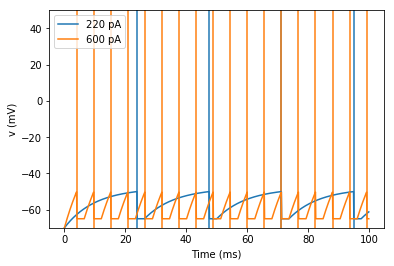

In [326]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

# Descrição dos parâmetros do modelo

Cm = 0.1*nfarad # capacitância da membrana
Rm = 100*Mohm # resistência da membrana
El = -70*mV # potencial de equilíbrio da membrana
vr = -65*mV # valor de tensão de repouso após 'resetagem'
duration = 100*ms
Vl = -50*mV
vmax=50*mV
vp=50*mV

eqs = '''
dv/dt = ((El - (v) )/ (Cm*Rm))+ (Ix/Cm): volt (unless refractory)
Ix : amp
'''
G = NeuronGroup(1, eqs, threshold= 'v>Vl', reset="v=vr",  method='euler', dt= 0.1*ms, refractory = 2.5*ms)
statemon_G = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon_G = SpikeMonitor(G,'v') # monitor de spikes
G.Ix = [220]*pA
G.v = El

K = NeuronGroup(1, eqs, threshold='v>Vl', reset= "v = vr", method='euler', dt= 0.1*ms, refractory = 2.5*ms)
statemon_K = StateMonitor(K, 'v', record=True) # monitor de potencial
spikemon_K = SpikeMonitor(K,'v') # monitor de spikes +vp*int(v>Vl) eleva pico
K.Ix = [600]*pA
K.v = El
run(duration)

for t in spikemon_G.spike_trains()[0]:
    plt.axvline(t/ms,0,50, c='C0', lw=1.5)
for t in spikemon_K.spike_trains()[0]:
    plt.axvline(t/ms,0,50, c='C1', lw=1.5)
plt.plot(statemon_G.t/ms, statemon_G.v[0]/mV, label = "220 pA")
plot(statemon_K.t/ms, statemon_K.v[0]/mV , label = "600 pA")
plt.ylim((-70, 50))
xlabel('Time (ms)')
ylabel('v (mV)')
legend()
show()